# Two-Tier Malware Detection for Raw Executables
[ Block-Based Implementation ]

## Pre-requisites:

* Please refer to the Jupyter notebook - [Data_Preprocessing_and_Partitioning.ipynb](Data_Preprocessing_and_Partitioning.ipynb) for the complete set of one-time pre-requisite steps to be carried for data preprocessing and partitioning. 

 
## Top Activation Block - based implementation : Overview:

In this implementation, the second tier of our framework leverages the below two information:
1. Qualified sections identified by Activation Trend Identification (ATI) mechanism.
2. Top activation blocks w.r.t Qualified sections

A byte block refers to the portion of the byte code covered by the convolution window of a CNN model at any given time. Block-based implementation aims to reduce the length of the input data required to train the Tier-2 model by discarding noisy data, i.e., rather than training the Tier-2 model on the entire byte content of PE samples in B1 set, it is trained using only the byte portions that corresponds to top activations generated by qualified sections over B1. This also leads to significant reduction in Tier-2 training time.

Once the qualified sections are found, the byte blocks related to top activations that are triggered by those qualified sections are found by tracing back from Tier-1 model's temporal max-pooling layer. They are then extracted and combined together as a single sequence of fixed length. Such data collected from each B1 sample forms the dataset used for training Tier-2.

*__NOTE:__* Flexibility to tune the size of the blocks indpendent of convolution window size is in future scope.


## High-level Sequence of Two-Tier Training-Validation-Testing Process:

```bash
TRAINING & VALIDATION:
----------------------
Load Training & Validation Partitions  -> Train & Evaluate Tier-1 model
Load Validation Partitions             -> Find Tier-1 model threshold (THD1) + Find & Store B1_Val set into partitions
Load Training Partitions again         -> Find & store B1_Train set using THD1
Load B1_Train partitions               -> Perform ATI over B1_Train + Find Qualified sections to Train Tier-2
Load B1_Train & B1_Val Partitions      -> Find & store top activation blocks into partitions using Qualified sections
Load B1 Train & Val Block partitions   -> Train & Evaluate Tier-2 model
Load B1_Validation partitions          -> Find Tier-2 model threshold (THD2)

TESTING:
--------
Load Tier-1 Test Partitions            -> Predict using Tier-1 model & store B1_Test set into partitions
Load B1_Test partitions                -> Find & store Top activation blocks into B1_Test_Block partitions
Load B1_Test_Block partitions          -> Predict using Tier-2 model & reconcile Tier-1 and Tier-2 results
```

## Sample Run:
The below sample run uses 20% of DS1 dataset (approx. 40k samples) and the output is provided for a single fold of cross-validation, where the training is allowed to run for 50 epochs with an early stopping criteria=5.

While running new experiments, start with a small early stopping value (param: EARLY_STOPPING_PATIENCE), such as 0 or 1,
to check the base time consumption, as each unit increment to this parameter may result in increased training time.

In [28]:
!python main.py 5  # Flag ONLY_TIER1_TRAINING is set to True 

Detected Platform: linux
Using TensorFlow backend.
2020-07-04 13:44:01.434310: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2020-07-04 13:44:01.447579: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
^C
Traceback (most recent call last):
  File "main.py", line 7, in <module>
    import core.generate_train_predict as gtp
  File "/project/6027298/aduraira/block/src/core/generate_train_predict.py", line 15, in <module>
    from plots.auc_seaborn import plot_cv_auc
  File "/project/6027298/aduraira/block/src/plots/auc_seaborn.py", line 4, in <module>
    import seaborn as sns
  File "/project/6027298/aduraira/tf2/lib/python3.6/site-packages/seaborn/__init__.py", line 16, in <module>
    from .widgets import *
  File "/project/6027298/aduraira/tf2/lib/python3.6/site-packages/seaborn/widgets.py", line 7, in <module>
    from ipywidgets import inter

## Tier-1 Results:


Tier1_F4_Train_Val_History


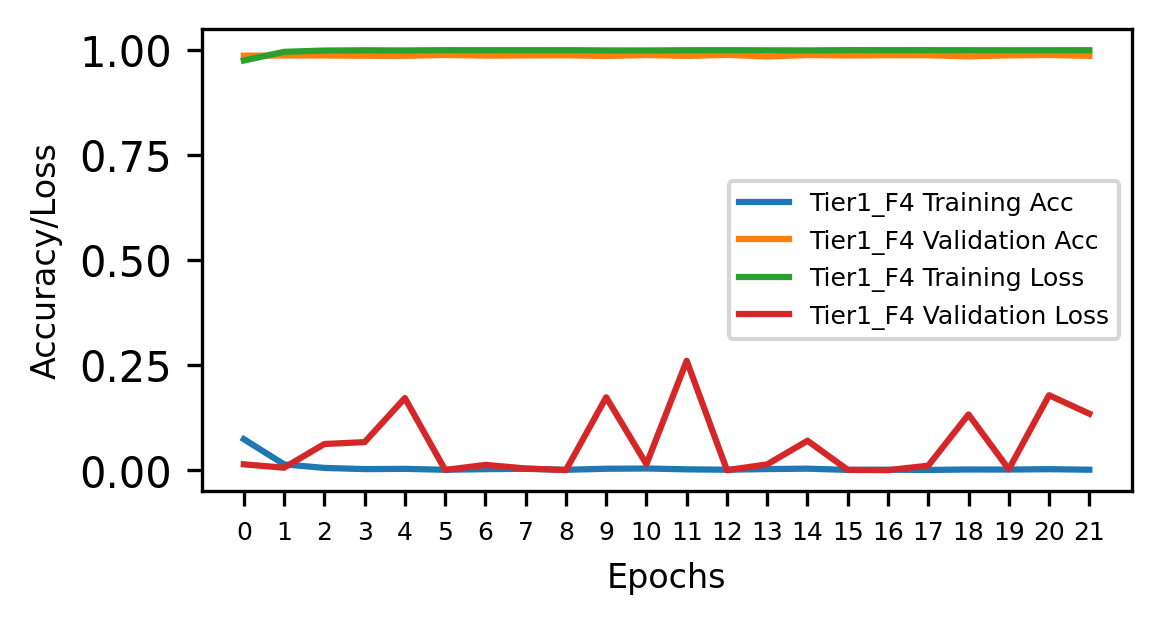

In [27]:
from IPython.display import Image 
import os
img_path = '../out/imgs/'
for _, _, imgs in os.walk(img_path):
    imgs.sort()
    for img in imgs:
        if 'Tier1' in img:
            print(img[:-4])
            pil_img = Image(filename=os.path.join(img_path, img), width = 600, height = 400)
            display(pil_img)

In [ ]:
from IPython.display import Image 
import os
img_path = '../out/imgs/'
for _, _, imgs in os.walk(img_path):
    imgs.sort()
    for img in imgs:
        if 'Tier2' in img:
            print(img[:-4])
            pil_img = Image(filename=os.path.join(img_path, img), width = 600, height = 400)
            display(pil_img)

cv_auc_10_percent


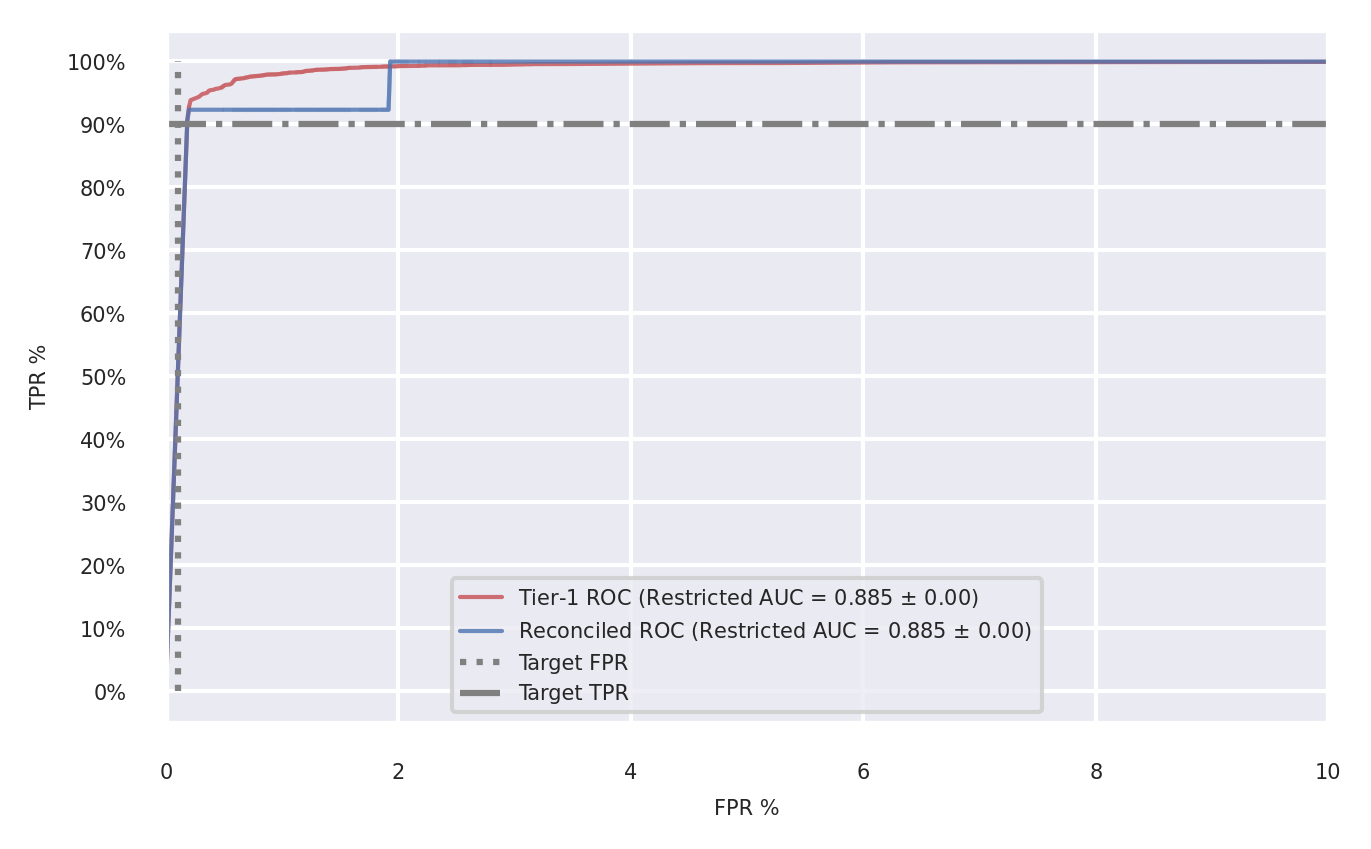

cv_auc_1_percent


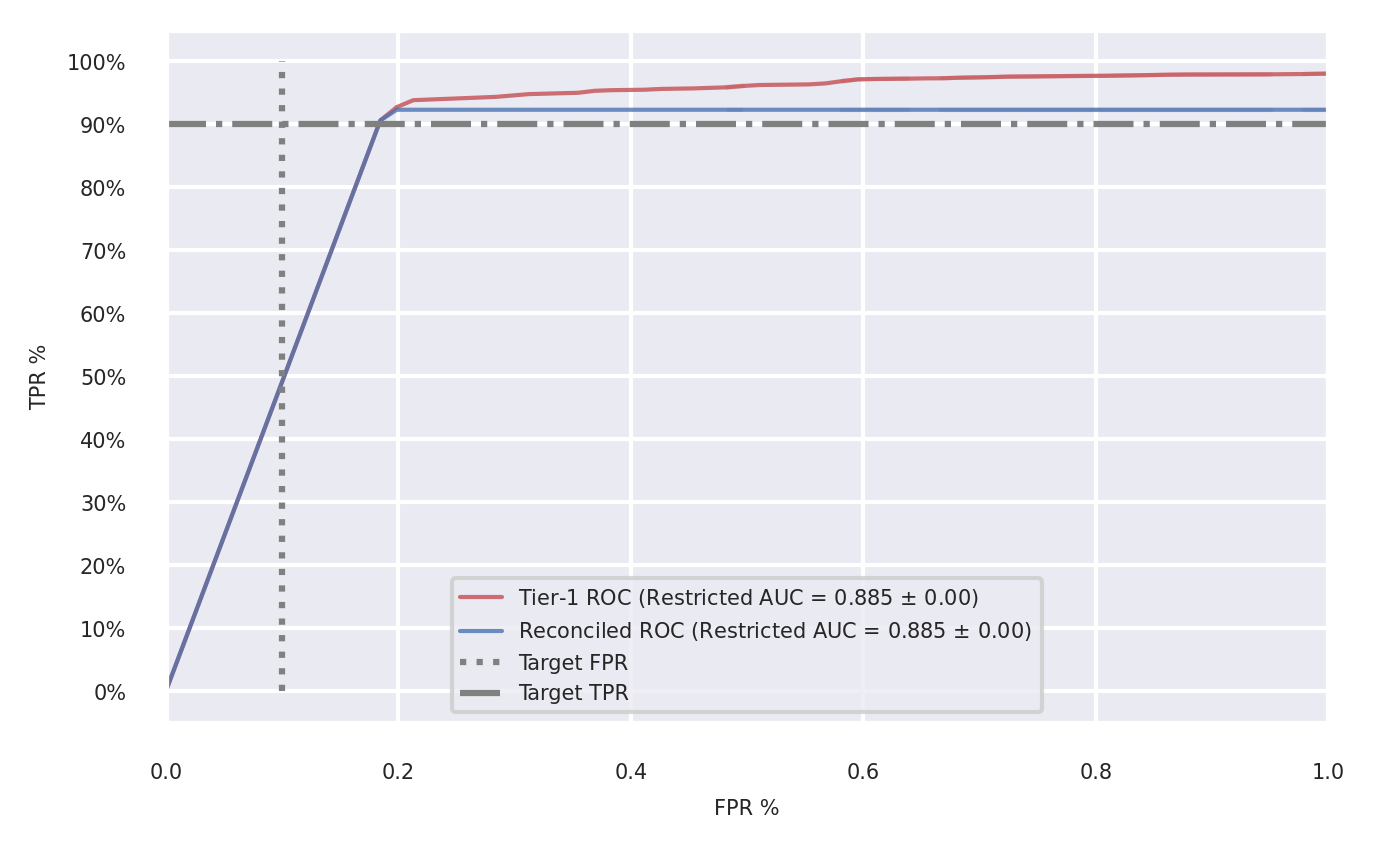

cv_auc_full


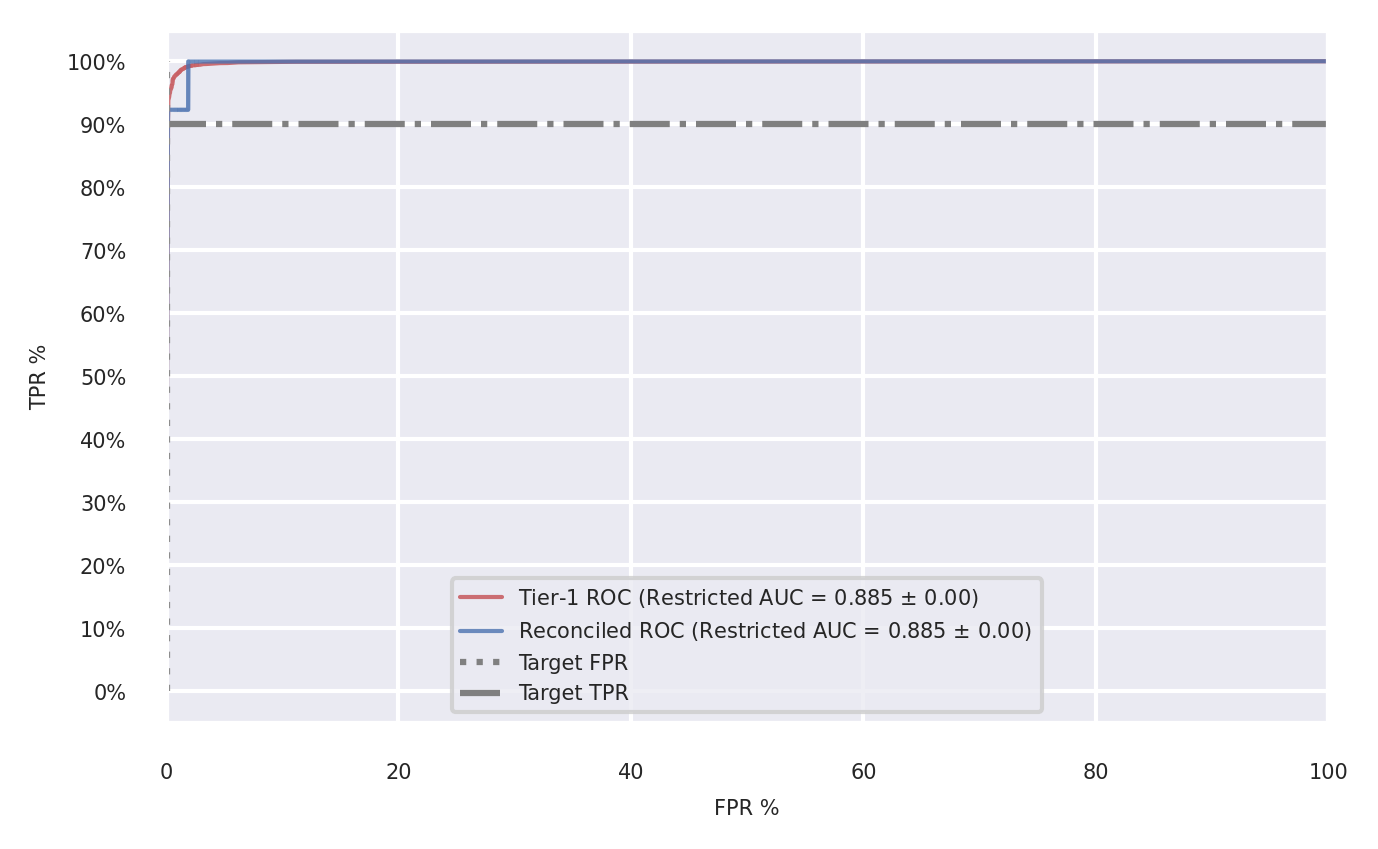

cv_auc_restricted


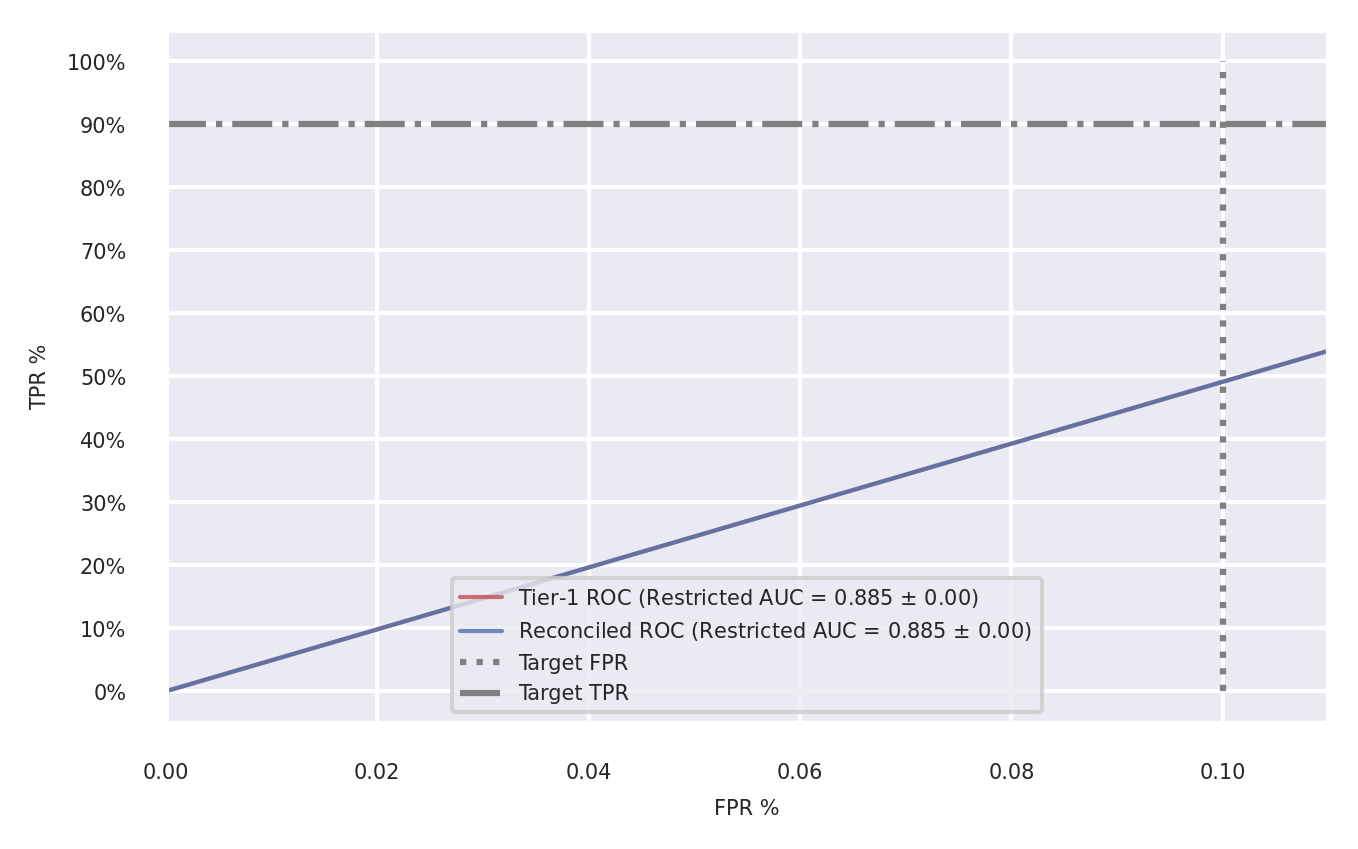

In [25]:
from IPython.display import Image 
import os
img_path = '../out/imgs/'
for _, _, imgs in os.walk(img_path):
    imgs.sort()
    for img in imgs:
        if 'auc' in img:
            print(img[:-4])
            pil_img = Image(filename=os.path.join(img_path, img), width = 600, height = 400)
            display(pil_img)